In [1]:
import pandas as pd
import numpy as np

Grades = pd.read_csv("gradesVF.csv")
students = []

for i in range(1,11):
    s = "S" + str(i)
    students.append(s)

Grades.index =students

print(students)
print(len(students))
print(Grades)

['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10']
10
     MIDTERM1  MIDTERM2  FINAL
S1         78        82    182
S2         82        85    180
S3         77        90    188
S4         75        77    149
S5         67        77    157
S6         71        64    175
S7         64        33    110
S8         92        88    184
S9         80        39    126
S10        89        64    116


In [2]:
import os
data_folder = 'Data'
for participants in os.listdir(data_folder):
    participants_path = os.path.join(data_folder , participants )
    Student_Final_data = pd.DataFrame()
    
    for exam in os.listdir(participants_path):
        
        exam_path = os.path.join(participants_path, exam)
        
        #EDA Dataframes
        Eda = pd.read_csv(os.path.join(exam_path ,  'EDA.csv'))
        Eda = Eda[2::]
        Eda.rename(columns={Eda.columns[0]: 'EDA'}, inplace=True)
        
        #HR dataframes 
        HR = pd.read_csv(os.path.join(exam_path ,  'HR.csv'))
        HR = HR[1::]
        HR.rename(columns= {HR.columns[0] : 'HR'} , inplace = True)
        
        #TEMP Dataframes
        TEMP = pd.read_csv(os.path.join(exam_path , "TEMP.csv"))
        TEMP = TEMP[1::]
        TEMP.rename(columns={TEMP.columns[0] : "TEMP"} , inplace = True)
        
        
        #IBI Dataframes 
        IBI = pd.read_csv(os.path.join(exam_path , "IBI.csv"))
        IBI = IBI[1::]
        IBI.rename(columns = {IBI.columns[0] : "IBI"} , inplace = True) 
        IBI = IBI.drop(IBI.columns[0] , axis = 1)   
        
        Final_data = pd.concat([Eda , TEMP , HR , IBI] , axis = 1)
        Student_Final_data = pd.concat([Student_Final_data ,Final_data] , axis = 1)
        
    titre = participants + "Data.csv"
    Student_Final_data.to_csv(titre , index = False)

In [3]:
s1 = pd.read_csv("S1Data.csv")
print(s1.head())
print(s1.shape)
print(s1.describe())

        EDA   TEMP     HR       IBI     EDA.1  TEMP.1   HR.1     IBI.1  \
0  0.001281  22.41  109.0  0.484397  0.001281   22.11  53.00  0.390643   
1  0.020500  22.41   90.0  0.484397  0.019220   22.11  56.67  0.312514   
2  0.020500  22.41   99.0  0.390643  0.019220   22.11  57.75  0.468771   
3  0.019219  22.41   90.0  0.515649  0.017939   22.11  58.80  0.515649   
4  0.017938  22.41   83.5  0.468771  0.017939   22.11  58.17  0.375017   

      EDA.2  TEMP.2    HR.2     IBI.2  
0  0.001281   22.07  112.50  0.453146  
1  0.019219   22.07  118.00  0.531274  
2  0.020500   22.07  105.00  0.453146  
3  0.019219   22.07  113.60  0.484397  
4  0.017938   22.07  115.33  0.484397  
(92292, 12)
                EDA          TEMP            HR          IBI         EDA.1  \
count  92291.000000  92288.000000  23064.000000  2167.000000  46745.000000   
mean       0.111096     26.331471    105.473729     0.714723      0.201571   
std        0.151944      4.436842     27.312394     0.089440      0.1

        EDA   TEMP     HR       IBI     EDA.1  TEMP.1   HR.1     IBI.1  \
0  0.001281  22.41  109.0  0.484397  0.001281   22.11  53.00  0.390643   
1  0.020500  22.41   90.0  0.484397  0.019220   22.11  56.67  0.312514   
2  0.020500  22.41   99.0  0.390643  0.019220   22.11  57.75  0.468771   
3  0.019219  22.41   90.0  0.515649  0.017939   22.11  58.80  0.515649   
4  0.017938  22.41   83.5  0.468771  0.017939   22.11  58.17  0.375017   

      EDA.2  TEMP.2    HR.2     IBI.2  
0  0.001281   22.07  112.50  0.453146  
1  0.019219   22.07  118.00  0.531274  
2  0.020500   22.07  105.00  0.453146  
3  0.019219   22.07  113.60  0.484397  
4  0.017938   22.07  115.33  0.484397  
            EDA   TEMP     HR       IBI  EDA.1  TEMP.1  HR.1     IBI.1  EDA.2  \
92287  0.020500    NaN    NaN       NaN    NaN     NaN   NaN       NaN    NaN   
92288  0.019219    NaN    NaN       NaN    NaN     NaN   NaN       NaN    NaN   
92289  0.021781    NaN    NaN       NaN    NaN     NaN   NaN       NaN  

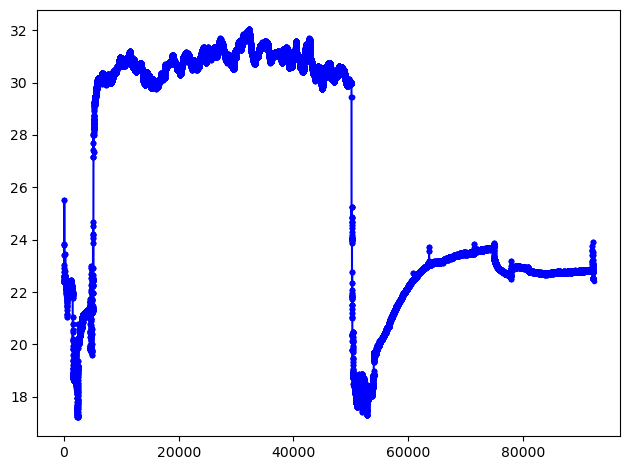

In [4]:
import matplotlib.pyplot as plt
df = pd.read_csv("S1Data.csv")
print(df.head())
print(df.tail())
index = np.arange(len(df['TEMP']))
plt.figure()
plt.plot(index, df['TEMP'], marker='.', color='blue')
plt.tight_layout()
plt.show()


(92292,)
(92292,)


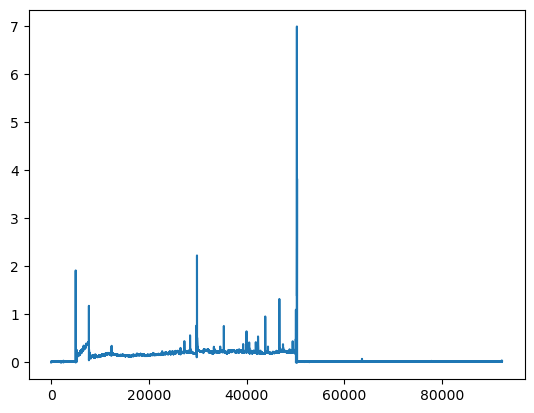

In [5]:
Eda_columns = df['EDA']
print(Eda_columns.shape)
Eda_index = np.arange(len(df['EDA']))
print(Eda_index.shape)
plt.figure()
plt.plot(Eda_index , Eda_columns)


(92292,)
[    0     1     2 ... 92285 92286 92287]
(92292,)


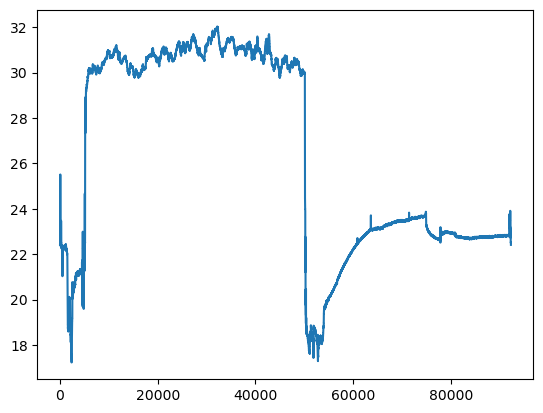

In [6]:
TEMP_columns = df[df['TEMP'].notna()]['TEMP']
print(Eda_columns.shape)
TEMP_index = np.arange(len(df[df['TEMP'].notna()]))
print(TEMP_index)
print(Eda_index.shape)
plt.figure()
plt.plot(TEMP_index , TEMP_columns)


(23064,)
[    0     1     2 ... 23061 23062 23063]
(23064,)


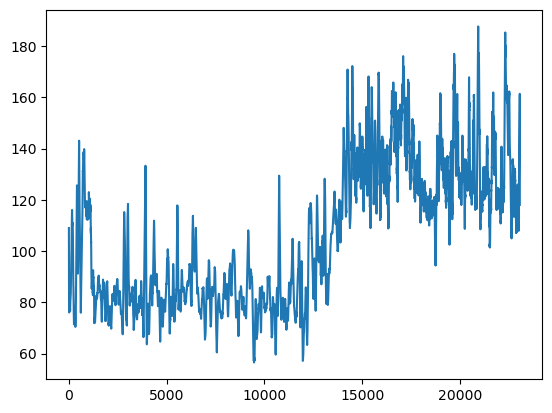

In [7]:
HR_columns = df[df['HR'].notna()]['HR']
print(HR_columns.shape)
HR_index = np.arange(len(df[df['HR'].notna()]))
print(HR_index)
print(HR_index.shape)
plt.figure()
plt.plot(HR_index , HR_columns)

In [8]:
df = df.rename(columns={' IBI' : 'IBI'})

(2167,)
[   0    1    2 ... 2164 2165 2166]
(2167,)


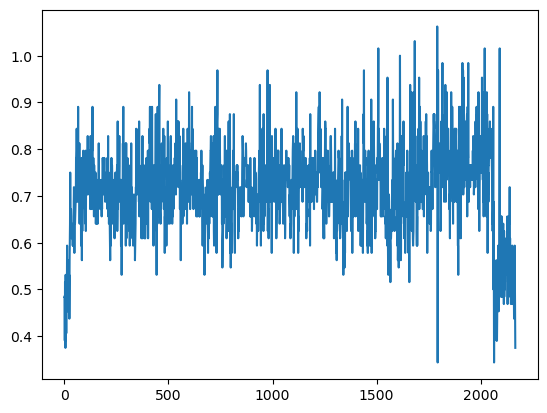

In [9]:

IBI_columns = df[df['IBI'].notna()]['IBI']
print(IBI_columns.shape)
IBI_index = np.arange(len(df[df['IBI'].notna()]))
print(IBI_index)
print(IBI_index.shape)
plt.figure()
plt.plot(IBI_index , IBI_columns)